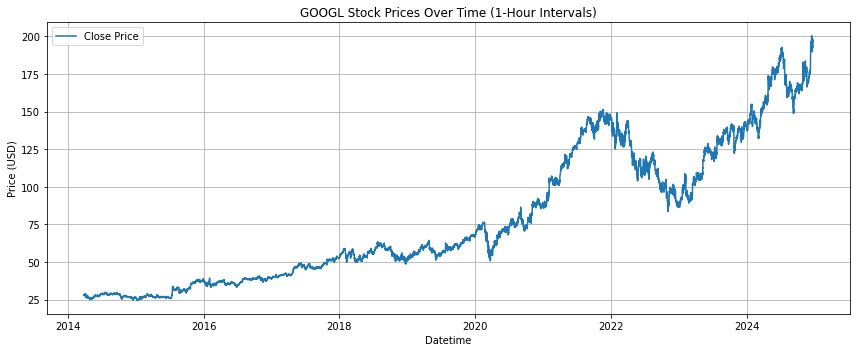

Train Shape: (17124, 4)
Test Shape: (1727, 4)
Regression Coefficients: [ 7.85976468e-01  8.03669483e-01 -5.89562863e-01 -7.25050853e-09]
Intercept: 0.0032835065230045757


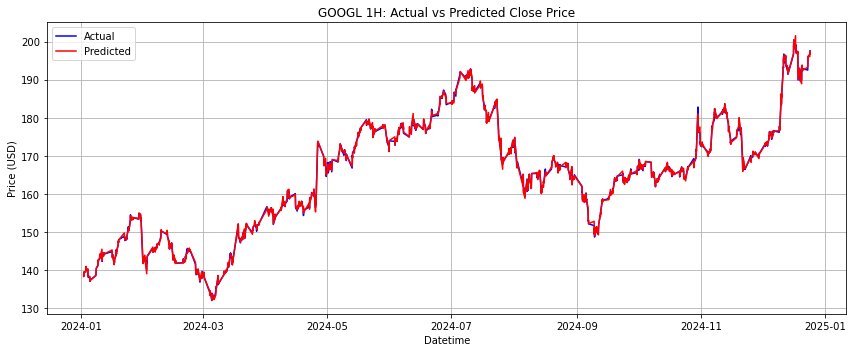

Prediction Summary:
       Actual Price  Predicted Price
count   1727.000000      1727.000000
mean     164.736746       164.742176
std       15.158349        15.164402
min      131.980000       132.081499
25%      153.210000       153.262642
50%      166.190000       166.138264
75%      176.050000       176.124335
max      200.440000       201.554743
Mean Absolute Error (MAE): 0.23900584768174865
Mean Squared Error (MSE): 0.11465928028531402
Recent Predictions:
                     Actual Price  Predicted Price
datetime                                          
2024-12-23 10:30:00       193.960       193.655718
2024-12-23 11:30:00       195.000       195.099574
2024-12-23 12:30:00       195.580       195.670810
2024-12-23 13:30:00       195.960       195.707475
2024-12-23 14:30:00       195.580       195.631666
2024-12-23 15:30:00       195.965       196.245297
2024-12-24 09:30:00       196.750       196.046024
2024-12-24 10:30:00       196.830       197.155496
2024-12-24 11:30:00     

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, mean_absolute_error

# Load the data
ticker = "GOOGL"
data = pd.read_csv("/Users/samhitharavind/Downloads/goog-1h.csv", parse_dates=["datetime"], index_col="datetime")

# Sort and plot closing price over time
data = data.sort_index()

plt.figure(figsize=(12, 5))
plt.plot(data.index, data["close"], label="Close Price")
plt.title(f"{ticker} Stock Prices Over Time (1-Hour Intervals)")
plt.xlabel("Datetime")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Define independent (features) and dependent (target) variables
X = data[["high", "low", "open", "volume"]]
Y = data["close"]

# Split data into training (before 2024-01-01) and test sets (from 2024-01-01 onwards)
train_data = data[data.index < "2024-01-01"]
test_data = data[data.index >= "2024-01-01"]

x_train = train_data[["high", "low", "open", "volume"]]
y_train = train_data["close"]

x_test = test_data[["high", "low", "open", "volume"]]
y_test = test_data["close"]

# Display shapes of the training and test datasets
print("Train Shape:", x_train.shape)
print("Test Shape:", x_test.shape)

# Train the linear regression model
reg = LinearRegression()
model = reg.fit(x_train, y_train)

# Get regression coefficients and intercept
coef = reg.coef_
intercept = reg.intercept_
print("Regression Coefficients:", coef)
print("Intercept:", intercept)

# Predict closing prices for test data
y_pred = reg.predict(x_test)

# Create prediction DataFrame
predict = pd.DataFrame(y_pred, index=y_test.index, columns=["Predicted Price"])

# Combine with actual values
diff = pd.concat([y_test, predict], axis=1)
diff.rename(columns={"close": "Actual Price"}, inplace=True)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 5))
plt.plot(diff.index, diff["Actual Price"], label="Actual", color="blue")
plt.plot(diff.index, diff["Predicted Price"], label="Predicted", color="red")
plt.title("GOOGL 1H: Actual vs Predicted Close Price")
plt.xlabel("Datetime")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics of prediction performance
print("Prediction Summary:")
print(diff.describe())

# Evaluate model performance
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Last 10 predictions
print("Recent Predictions:")
print(diff.tail(10))

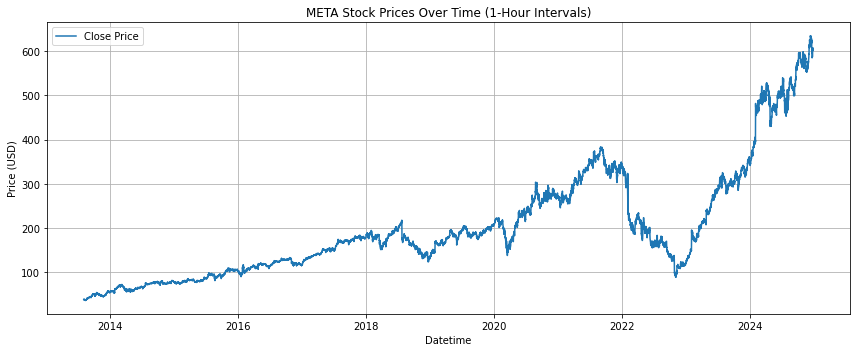

Train Shape: (18266, 4)
Test Shape: (1734, 4)
Regression Coefficients: [ 7.87012569e-01  7.73128111e-01 -5.60134837e-01  1.41883851e-08]
Intercept: 0.005991230093343347


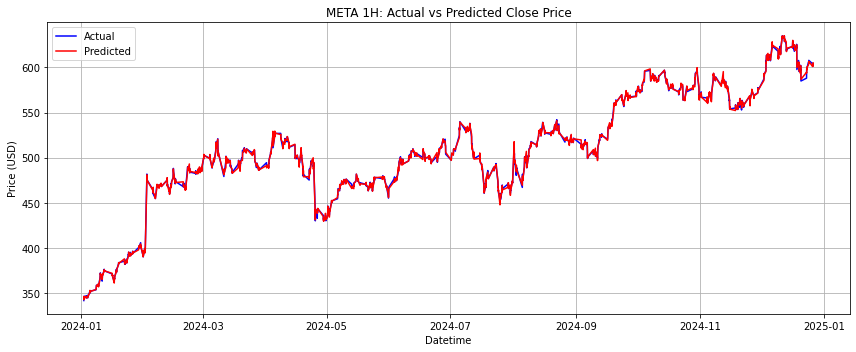

Prediction Summary:
       Actual Price  Predicted Price
count   1734.000000      1734.000000
mean     508.004020       507.968660
std       61.799691        61.804360
min      341.540000       342.492040
25%      474.782500       474.722482
50%      503.825000       504.324134
75%      560.812500       560.432001
max      635.140000       635.253980
Mean Absolute Error (MAE): 0.9274499527732054
Mean Squared Error (MSE): 1.7474521909002068
Recent Predictions:
                     Actual Price  Predicted Price
datetime                                          
2024-12-24 10:30:00        606.33       605.404585
2024-12-24 11:30:00        604.89       605.369265
2024-12-24 12:30:00        607.85       606.683500
2024-12-26 09:30:00        604.00       601.011192
2024-12-26 10:30:00        601.43       601.872617
2024-12-26 11:30:00        601.88       602.815910
2024-12-26 12:30:00        603.08       601.439701
2024-12-26 13:30:00        603.36       603.772006
2024-12-26 14:30:00       

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, mean_absolute_error

# Load the data
ticker = "META"
data = pd.read_csv("/Users/samhitharavind/Downloads/meta-1h.csv", parse_dates=["datetime"], index_col="datetime")

# Sort and plot closing price over time
data = data.sort_index()

plt.figure(figsize=(12, 5))
plt.plot(data.index, data["close"], label="Close Price")
plt.title(f"{ticker} Stock Prices Over Time (1-Hour Intervals)")
plt.xlabel("Datetime")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Define independent (features) and dependent (target) variables
X = data[["high", "low", "open", "volume"]]
Y = data["close"]

# Split data into training (before 2024-01-01) and test sets (from 2024-01-01 onwards)
train_data = data[data.index < "2024-01-01"]
test_data = data[data.index >= "2024-01-01"]

x_train = train_data[["high", "low", "open", "volume"]]
y_train = train_data["close"]

x_test = test_data[["high", "low", "open", "volume"]]
y_test = test_data["close"]

# Display shapes of the training and test datasets
print("Train Shape:", x_train.shape)
print("Test Shape:", x_test.shape)

# Train the linear regression model
reg = LinearRegression()
model = reg.fit(x_train, y_train)

# Get regression coefficients and intercept
coef = reg.coef_
intercept = reg.intercept_
print("Regression Coefficients:", coef)
print("Intercept:", intercept)

# Predict closing prices for test data
y_pred = reg.predict(x_test)

# Create prediction DataFrame
predict = pd.DataFrame(y_pred, index=y_test.index, columns=["Predicted Price"])

# Combine with actual values
diff = pd.concat([y_test, predict], axis=1)
diff.rename(columns={"close": "Actual Price"}, inplace=True)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 5))
plt.plot(diff.index, diff["Actual Price"], label="Actual", color="blue")
plt.plot(diff.index, diff["Predicted Price"], label="Predicted", color="red")
plt.title("META 1H: Actual vs Predicted Close Price")
plt.xlabel("Datetime")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics of prediction performance
print("Prediction Summary:")
print(diff.describe())

# Evaluate model performance
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

# Last 10 predictions
print("Recent Predictions:")
print(diff.tail(10))